🔹 Transaction Amount Trends Over Time:


,Effective Date,Total_Transaction_Amount
0,1900-01-01,-7.829947e+05
1,1995-12-27,0.000000e+00
2,1996-03-15,-3.000000e+07
3,1996-04-16,0.000000e+00
4,1997-02-04,-6.502997e+06
...,...,...
1947,2016-12-27,-1.200999e+08
1948,2016-12-28,-2.861941e+08
1949,2016-12-29,-3.281832e+08
1950,2016-12-30,-1.658824e+09


Results saved successfully to: Transaction_Amount_Trends.xlsx


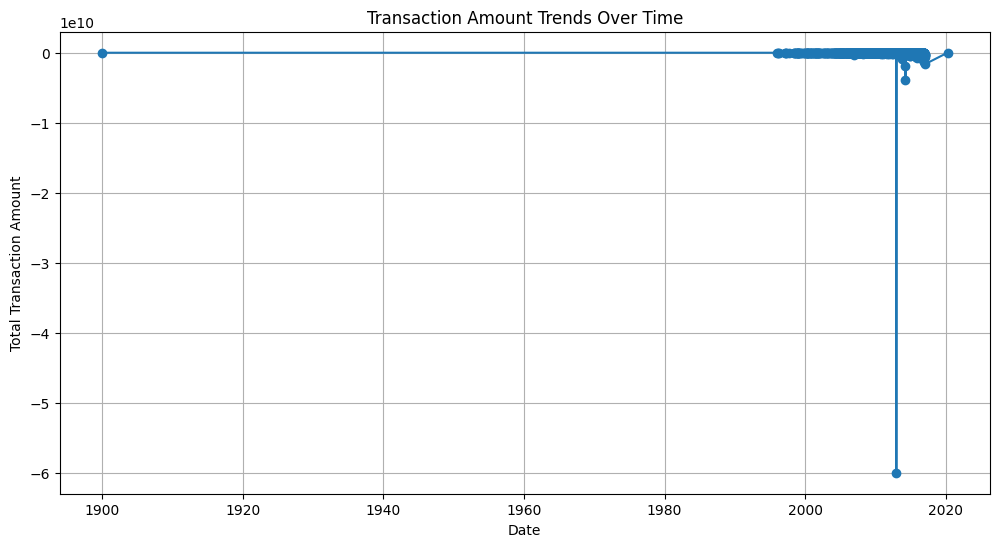

In [9]:
#  Loading Required Libraries and Data

import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import matplotlib.dates as mdates

# file path
file_path = "../data/Common Data Warehouse-Orginal.xlsx"


xls = pd.ExcelFile(file_path)


financial_df = xls.parse("Financial")  # Contains transaction amounts and dates
instrument_df = xls.parse("Instrument")  # Contains relevant date columns

#  Merging Financial Data with Instrument Data 

# Merging Financial Data with Instrument Table on Agreement ID 
financial_instrument_df = financial_df.merge(instrument_df, left_on="Agmt ID", right_on="Agreement ID", how="left")

#  Converting Date Columns to Datetime Format 

date_columns = ["Effective Date", "Closing Date", "Maturity Date", "Registration Date"]
for col in date_columns:
    financial_instrument_df[col] = pd.to_datetime(financial_instrument_df[col], errors='coerce')

financial_instrument_df = financial_instrument_df.dropna(subset=["Effective Date"])

# Grouping by Effective Date and sum the transaction amounts
transaction_trends = financial_instrument_df.groupby("Effective Date").agg(
    Total_Transaction_Amount=("Amount", "sum")
).reset_index()

# Sort by date for trend visualization
transaction_trends = transaction_trends.sort_values(by="Effective Date")

#  Results ---
print("🔹 Transaction Amount Trends Over Time:")
display(transaction_trends)

#  Save Results to Excel 
output_file_path = "Transaction_Amount_Trends.xlsx"
transaction_trends.to_excel(output_file_path, index=False)

print(f"Results saved successfully to: {output_file_path}")

# Visualize Trends Over Time
plt.figure(figsize=(12, 6))
plt.plot(transaction_trends["Effective Date"], transaction_trends["Total_Transaction_Amount"], marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Total Transaction Amount")
plt.title("Transaction Amount Trends Over Time")
plt.grid(True)
plt.show()

